# Wind Power Generation Forecasting

In [1]:
# importing all the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling

In [2]:
# Load the csv (Dataset) files
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

In [3]:
# See the location 1 
location1.head() # show you top 5 rows

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
# Add a new column to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [5]:
# Ssave the merged dataset to a new CSV file
merged_data.to_csv('merged_locations.csv', index=False)

In [6]:
# To see the basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [7]:
# To check the statistics of Dataset
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [8]:
# Check the missing values
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [24]:
# To check the duplicated rows
merged_data.duplicated().sum()

np.int64(0)

In [27]:
# 1. First ensure proper display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Prevent line wrapping

# 2. Convert boolean dummies to integers (0/1)
location_cols = [col for col in merged_data.columns if col.startswith('Location_')]
merged_data[location_cols] = merged_data[location_cols].astype(int)

# 3. Display the DataFrame (will now show 0/1 instead of False/True)
print(merged_data.head())

                  Time  temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m   Power  Location_Location3  Location_Location4  Location_Location2_1
0  2017-01-02 00:00:00            28.5                   85         24.5           1.44            1.26                146                 162            1.4  0.1635                   0                   0                     0
1  2017-01-02 01:00:00            28.4                   86         24.7           2.06            3.99                151                 158            4.4  0.1424                   0                   0                     0
2  2017-01-02 02:00:00            26.8                   91         24.5           1.30            2.78                148                 150            3.2  0.1214                   0                   0                     0
3  2017-01-02 03:00:00            27.4                   88         24.3           1.30 

In [28]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location3', 'Location_Location4', 'Location_Location2_1'], dtype='object')

In [29]:
# Let's remove time col
merged_data.drop('Time', axis=1, inplace=True)

In [30]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location3,Location_Location4,Location_Location2_1
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


### Week 2: EDA 

In [31]:
# Let's extract the numerical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location3', 'Location_Location4', 'Location_Location2_1'], dtype='object')

In [32]:
merged_data.shape

(175200, 12)

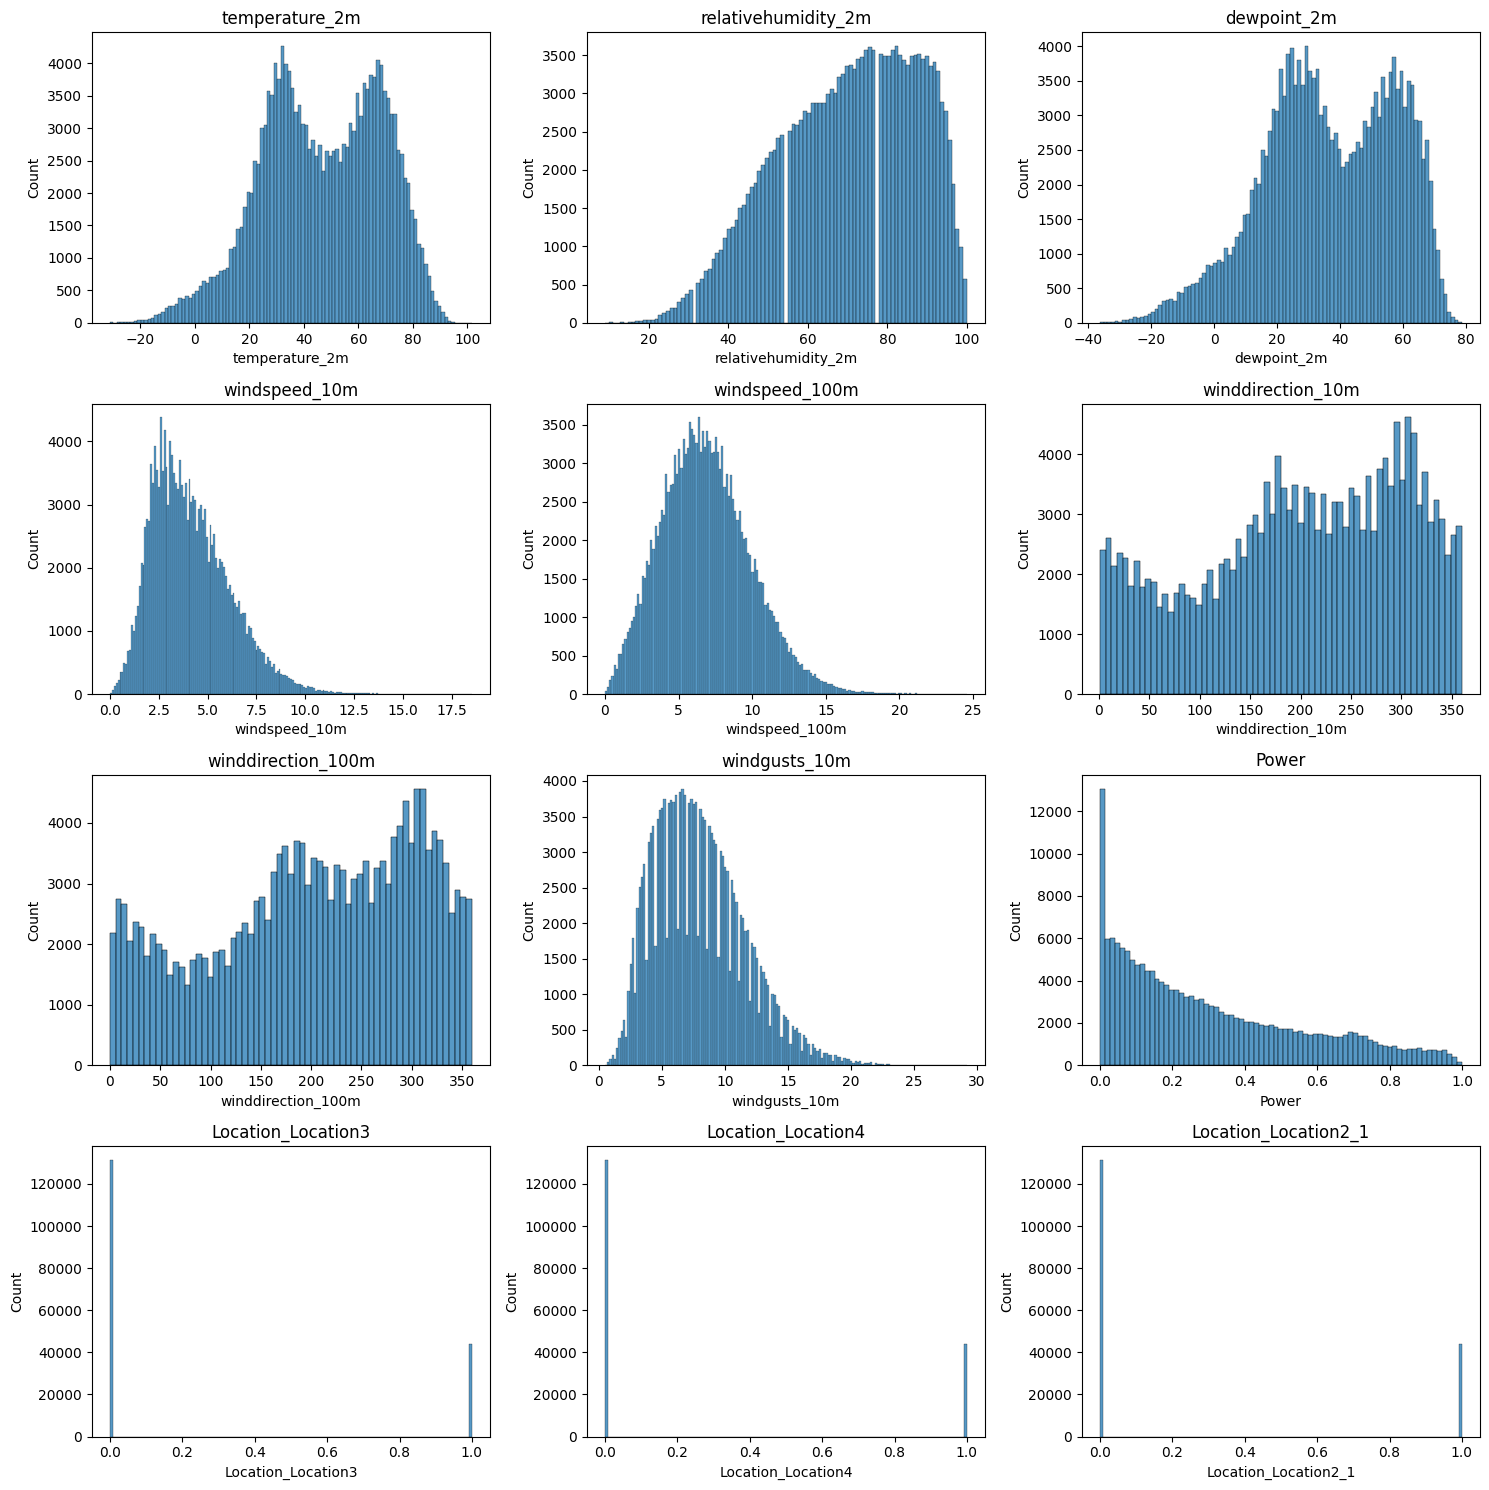

In [33]:
# let's plot using subplots for the data distribution of each numerical cols
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() # we have 2d array and for that we need indices, rows/cols, so converting into 1d array
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

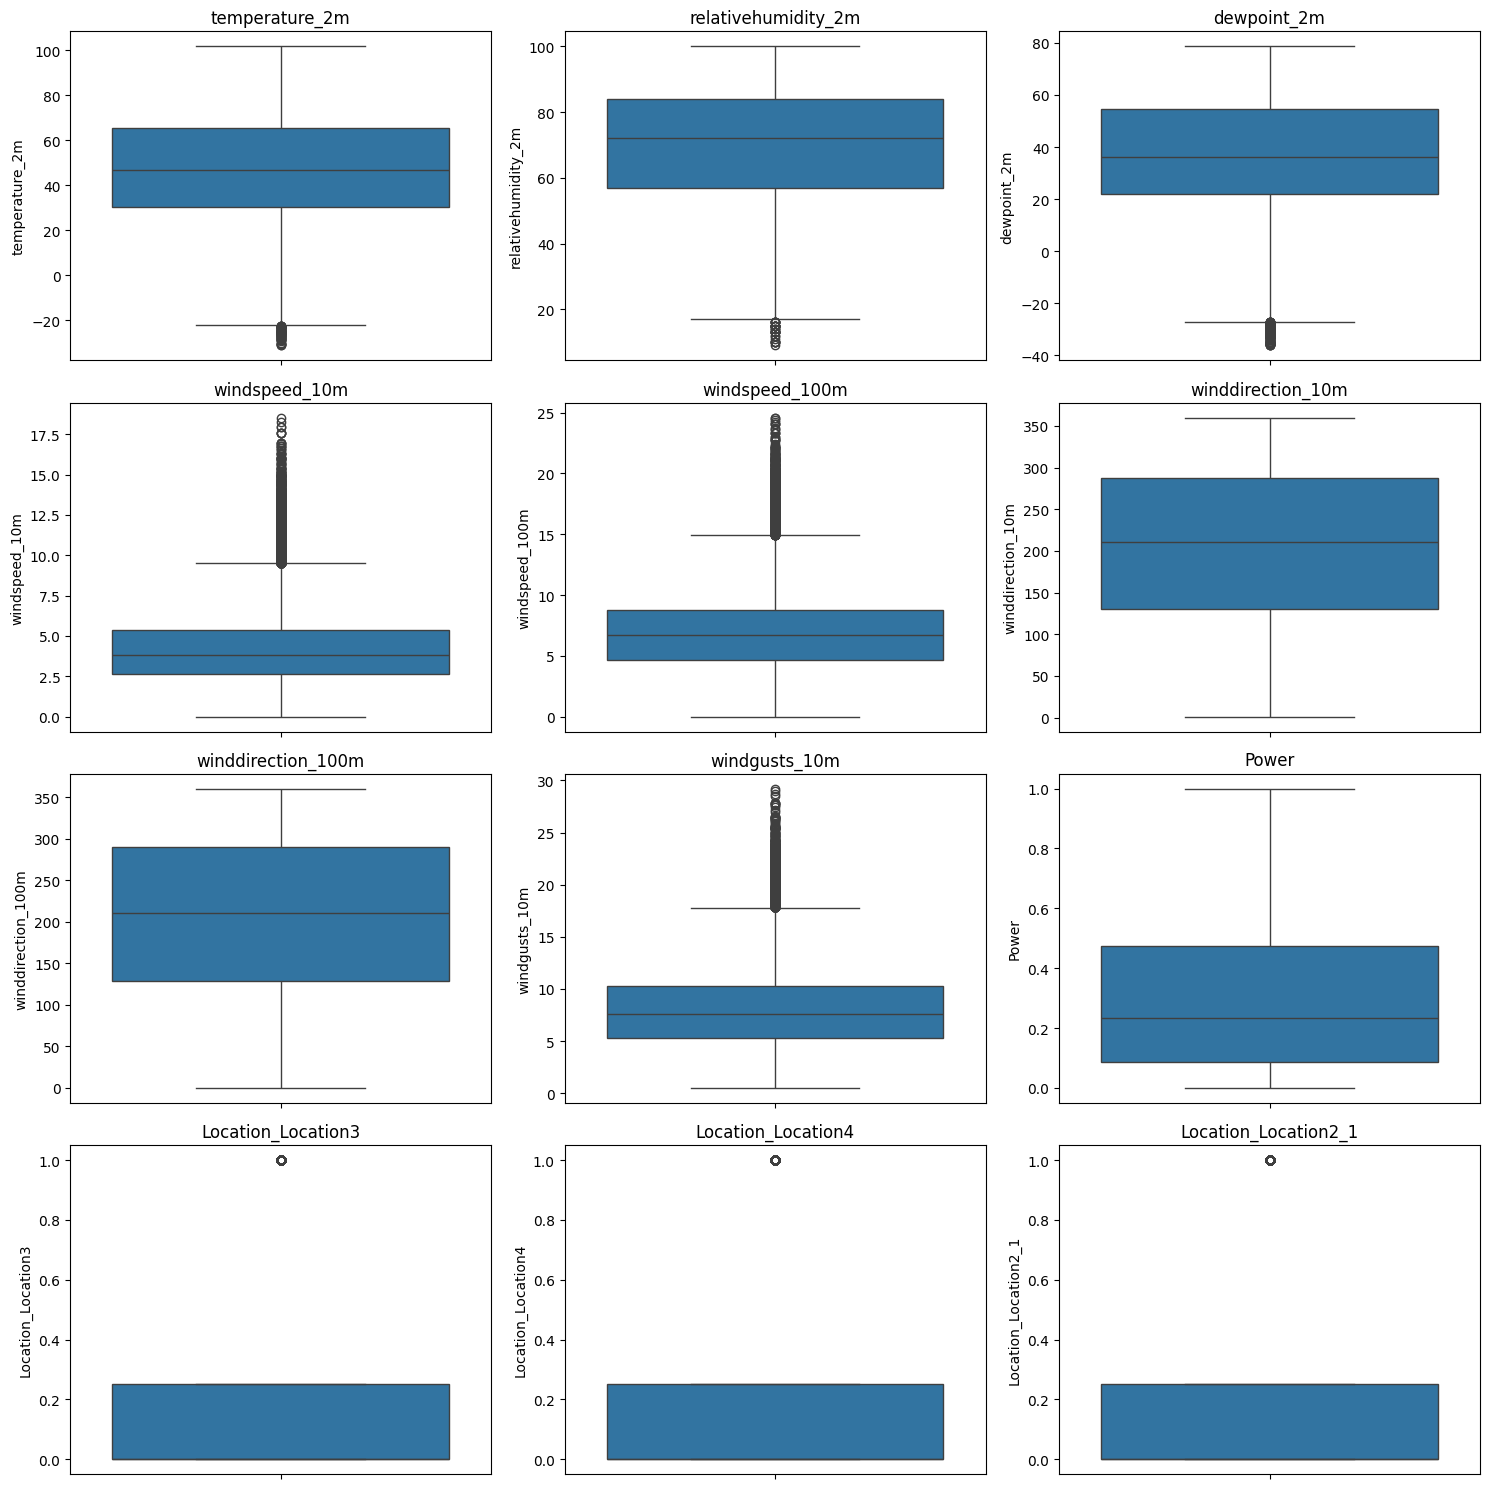

In [34]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

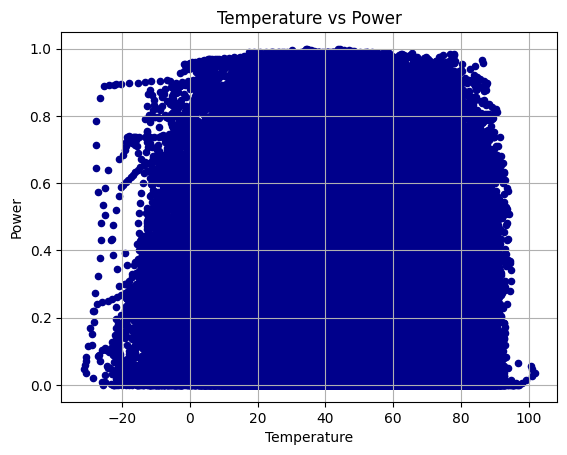

In [35]:
# let's use scatter plot to see the relationship between power & temp
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

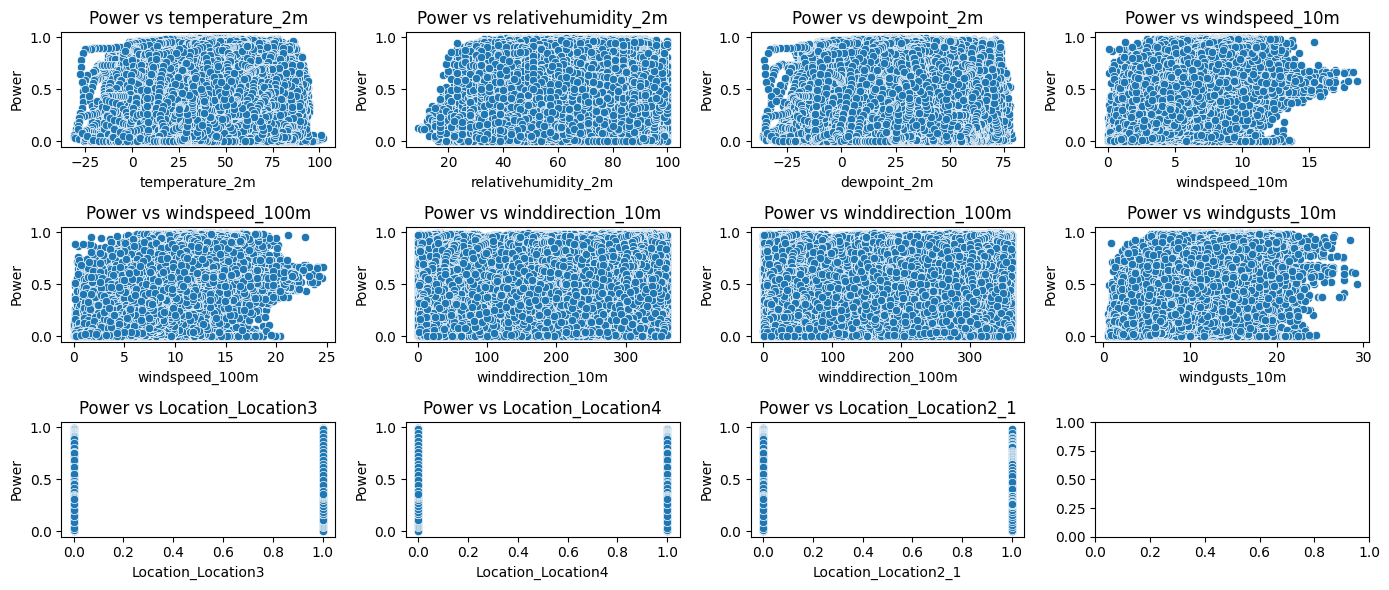

In [36]:
# Creating multiple plots to see the relation btw different cols and power
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

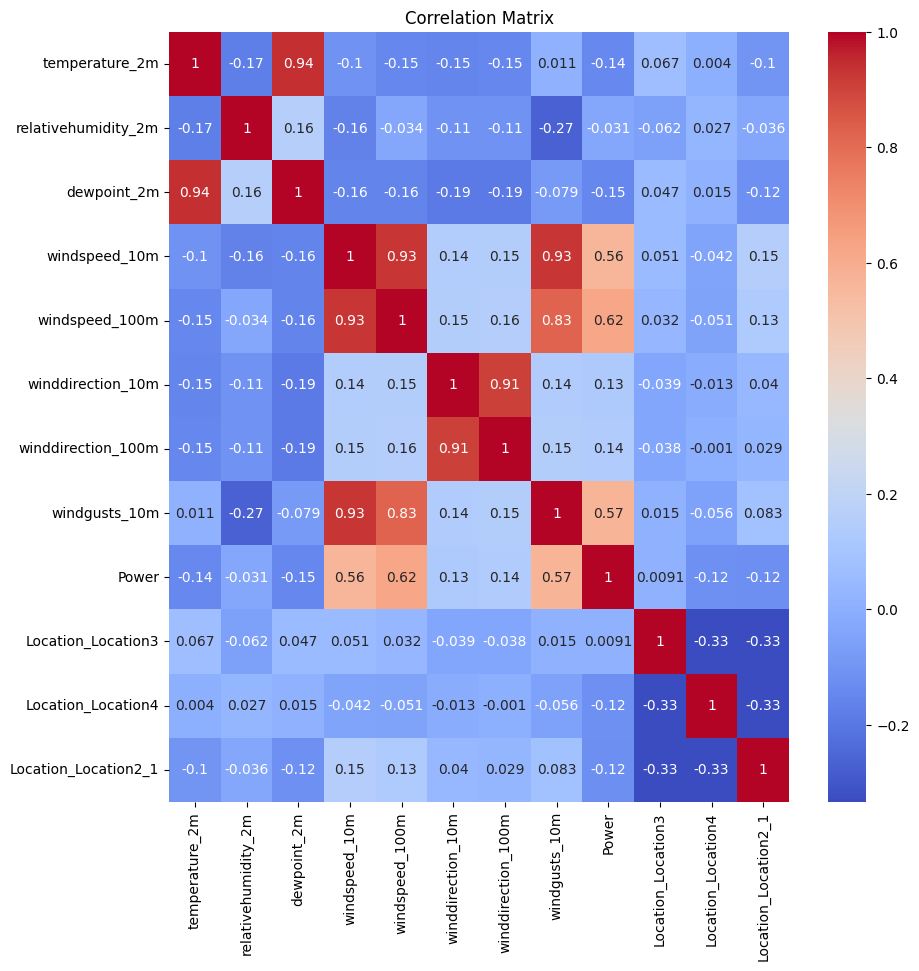

In [37]:
# Check the correlation between the cols and power
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Week 3: Data modeling and evaluate

In [38]:
# Feature and target selection
X = merged_data.drop('Power', axis=1) # features
y = merged_data['Power'] # target

In [39]:
# Split the data into training and test sets - 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.13765858053375127
Mean Squared Error: 0.03254230698731513
R Squared Score: 0.5127994646410983


In [44]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10659206903538813
RF MSE: 0.021548445866541924
RF R2 Score: 0.6773918220849007


In [47]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 7.7 MB/s eta 0:00:20
    --------------------------------------- 2.9/150.0 MB 7.0 MB/s eta 0:00:22
   - -------------------------------------- 4.5/150.0 MB 7.1 MB/s eta 0:00:21
   - -------------------------------------- 5.2/150.0 MB 6.9 MB/s eta 0:00:21
   - -------------------------------------- 6.0/150.0 MB 5.8 MB/s eta 0:00:25
   - -------------------------------------- 6.3/150.0 MB 5.0 MB/s eta 0:00:30
   -- ------------------------------------- 7.9/150.0 MB 5.3 MB/s eta 0:00:27
   -- ------------------------------------- 9.4/150.0 MB 5.5 MB/s eta 0:00:26
   -- ------------------------------------- 11.0/150.0 MB 5.7 MB/s eta 0:00:25
   --- ------------------------------------ 12.6/150.0 MB 5.8 MB/s eta 0:00:24
   --- ------------------------------------ 14.2/150.0 MB 5.9 MB/s eta 0:00:23
   ---- ----------------------------------- 15.5/150.0 MB 6.0 MB/s e

In [48]:
# Train using XGBoost Regressor Model
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')

XGB MAE: 0.11572270575599727
XGB MSE: 0.024946094824212436
XGB R2: 0.626524611232765


In [50]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MAE: 0.11378189769691642
Tuned Model Mean Absolute Error (MAE): 0.11299622910506392
Tuned Model Mean Squared Error (MSE): 0.023781247540075
Tuned Model R^2 Score: 0.6439638856107105
